In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/workspaces/Repository_Data_Science_Challenges/Desafios/F1/Data/Base.csv')

In [3]:
Perf = df[df['year'] == 2024]
Perf = Perf[['forename', 'position', 'grid', 'date', 'name']]

In [4]:
Perf

,forename,position,grid,date,name
0,Lando,1,1,2024-12-08,Abu Dhabi Grand Prix
1,Carlos,2,3,2024-12-08,Abu Dhabi Grand Prix
2,Charles,3,19,2024-12-08,Abu Dhabi Grand Prix
3,Lewis,4,16,2024-12-08,Abu Dhabi Grand Prix
4,George,5,6,2024-12-08,Abu Dhabi Grand Prix
...,...,...,...,...,...
474,Nico,16,10,2024-03-02,Bahrain Grand Prix
475,Esteban,17,19,2024-03-02,Bahrain Grand Prix
476,Pierre,18,20,2024-03-02,Bahrain Grand Prix
477,Valtteri,19,16,2024-03-02,Bahrain Grand Prix


Decidi que não tiraria ponto daqueles que tiveram DNF por não saber a causa

In [5]:
Perf['Perfomance'] = Perf.apply(
    lambda row: row['grid'] - row['position'] if row['position'] != 999 else 0,
    axis=1
)

In [6]:
Perf

,forename,position,grid,date,name,Perfomance
0,Lando,1,1,2024-12-08,Abu Dhabi Grand Prix,0
1,Carlos,2,3,2024-12-08,Abu Dhabi Grand Prix,1
2,Charles,3,19,2024-12-08,Abu Dhabi Grand Prix,16
3,Lewis,4,16,2024-12-08,Abu Dhabi Grand Prix,12
4,George,5,6,2024-12-08,Abu Dhabi Grand Prix,1
...,...,...,...,...,...,...
474,Nico,16,10,2024-03-02,Bahrain Grand Prix,-6
475,Esteban,17,19,2024-03-02,Bahrain Grand Prix,2
476,Pierre,18,20,2024-03-02,Bahrain Grand Prix,2
477,Valtteri,19,16,2024-03-02,Bahrain Grand Prix,-3


In [7]:
SomaPerfomance = Perf.groupby('forename', as_index=False)['Perfomance'].sum()
SomaPerfomance = SomaPerfomance.sort_values(by='Perfomance', ascending=True)

In [8]:
SomaPerfomance

,forename,Perfomance
23,Yuki,-28
12,Lando,-22
4,Esteban,-20
22,Valtteri,-19
5,Fernando,-13
0,Alexander,-9
21,Sergio,-4
14,Liam,-2
1,Carlos,0
6,Franco,2


In [9]:
colors = ['lime' if val >= 0 else 'red' for val in SomaPerfomance['Perfomance']]


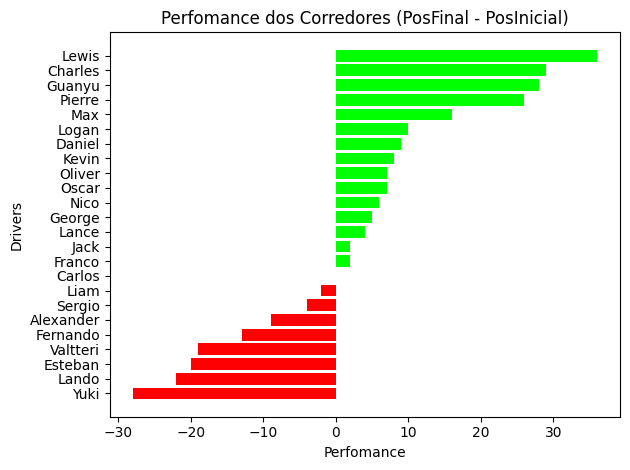

In [10]:
plt.barh(SomaPerfomance['forename'], SomaPerfomance['Perfomance'], color = colors)
plt.title('Perfomance dos Corredores (PosFinal - PosInicial)')
plt.ylabel('Drivers')
plt.xlabel('Perfomance')
plt.tight_layout()